# Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import graphviz
import mglearn as mglearn
import mglearn.plots
import mglearn.datasets
import matplotlib.pyplot as plt
# ensures plots are inlined for the notebook presentation
%matplotlib inline 
import scipy as sp
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, ward
import time
from IPython.display import display
import seaborn as sns
import os
import tensorflow as tf

In [2]:
# Sci-Kit Imports
import sklearn as sklearn
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.decomposition import NMF
# from sklearn.manifold import TSNE
# from sklearn.cluster import KMeans
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.cluster import DBSCAN

# import sklearn.datasets as datasets
# from sklearn.datasets import make_blobs
# from sklearn.datasets import load_breast_cancer
# from sklearn.datasets import fetch_lfw_people
# from sklearn.datasets import load_digits
# from sklearn.datasets import make_moons
# from sklearn.datasets import make_circles
from sklearn.datasets import load_wine

In [3]:
# Mute warnings
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# warnings.simplefilter(action='ignore', category=WARNING)

# Preprocess Wine data and transform

In [4]:
# Load Wine data set, and describe
# from sklearn.datasets import load_wine
wine = load_wine(return_X_y=False)

#print(wine['DESCR'])

for key,value in wine.items():
    print(key,'\n',value,'\n')

data 
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]] 

target 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

target_names 
 ['class_0' 'class_1' 'class_2'] 

DESCR 
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three c

In [5]:
# Create Pandas DataFrame
wine_X = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_y = pd.DataFrame(wine.target, columns=['Target'])

wine_df = pd.concat([wine_y, wine_X], axis=1)
wine_df.head()

,Target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


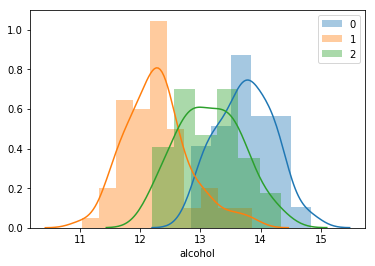

In [6]:
# Plot the Target as separated by distinct alcohol distributions showing three relatively
# separate classes
for i in wine_df.Target.unique():
    sns.distplot(wine_df['alcohol'][wine_df.Target==i],
                 kde=1,label='{}'.format(i))

plt.legend()

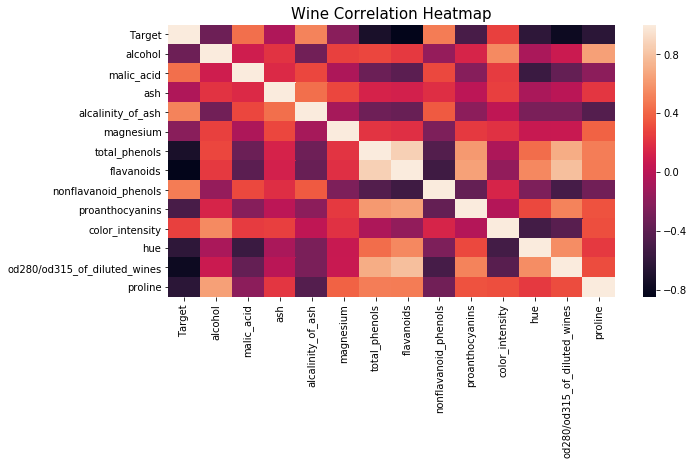

In [7]:
# Plot Correlation Heatmap
plt.figure(figsize=(10,5))
ax = plt.axes()
corr = wine_df.corr()
sns.heatmap(corr, ax=ax, xticklabels=corr.columns.values,yticklabels=corr.columns.values)
ax.set_title('Wine Correlation Heatmap', fontsize=15)
plt.show()

# NOTE: total_phenols and flavanoids show a high correlation appearing to be above or about 0.8 
#       on our correlation heatmap

# Random Forest Classifier model 1

In [8]:
# Random Forest with no feature selection to remove unnecessary variables
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, 
                                                    test_size=0.30, random_state=321)
rf1 = RandomForestClassifier(random_state=321)
rf1.fit(X_train, y_train)

y_pred = rf1.predict(X_test)
print('Accuracy (forest): %.2f' % accuracy_score(y_test, y_pred))

# NOTE: Basic RFC has a 93% accuracy score

Accuracy (forest): 0.93


### Feature selection (drop feature) with multicollinearity 

In [9]:
# Dropping highly correlated total_phenols (vs. flavanoids) for optimized analysis
wine_df.drop(['total_phenols'], axis=1, inplace=True)
wine_df.head()

,Target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
# Random Forest Model with feature selection
# X = Remove y from wine_df (so we can use 'engineered' dataframe)
X_wine_df = wine_df.drop(['Target'], axis=1)

# y = Remove X from wine_df by selecting the Target column
y_wine_df = wine_df['Target']


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_wine_df, y_wine_df, 
                                                    test_size=0.30, random_state=321)

    
rf1 = RandomForestClassifier(random_state=321)
rf1.fit(X_train, y_train)

y_pred = rf1.predict(X_test)
print('Accuracy (forest): %.2f' % accuracy_score(y_test, y_pred))

# NOTE: Random Forest model 1 with Feature Selection to remove multicollinearity improves score to 96%

Accuracy (forest): 0.96


# Feature Extraction via PCA on Random Forest model 1

In [11]:
# Run PCA as Feature Extraction as reduced feature may not be identical to any original feature
# Run RandomForestClassifier 'as is'
rf1_pca = make_pipeline(PCA(n_components=11), RandomForestClassifier(random_state=321))

rf1_pca.fit(X_train, y_train) 

y_pred = rf1_pca.predict(X_test)

print('\nPrediction accuracy with PCA')
print('{:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))

print("Training set R^2 score: {:.2f}".format(rf1_pca.score(X_train, y_train))) 
print("Test set R^2 score: {:.2f}".format(rf1_pca.score(X_test, y_test)))

# NOTE: Prediction accuracy with PCA on a few less than 13 components remains the same as base model 
#      since the RFC also reduces multicollinearity as part of its process and accuracy remains ~96%


Prediction accuracy with PCA
96.30%
Training set R^2 score: 1.00
Test set R^2 score: 0.96


# Random Forest model 2 with hyperparameter tuning

In [12]:
# Run RandomForestClassifier with additional hyperparameter tuning
rf2 = RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=2, random_state=321)

# Fit to training data for X and y
rf2.fit(X_train, y_train) 

# Predict y by applying fitted RFC to X test features
y_pred = rf2.predict(X_test)

# Score y test holdout against y predictions
print('\nPrediction accuracy with further tuning')
print('{:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))

# Score train and tests for comparison as well
print("Training set R^2 score: {:.2f}".format(rf2.score(X_train, y_train))) 
print("Test set R^2 score: {:.2f}".format(rf2.score(X_test, y_test)))

# NOTE: Prediction accuracy improves with additional hyperparameter tuning on RFC model
#       increasing prediction accuracy to ~98.15%


Prediction accuracy with further tuning
98.15%
Training set R^2 score: 1.00
Test set R^2 score: 0.98


# Random Forest model 3 with addt'l hyperparameter tuning

In [13]:
#///////////////// Multiple RFC's with Tuning, but no improvemnet //////////////////////
# Run RandomForestClassifier with additional hyperparameter tuning ~96%
# rf3 = RandomForestClassifier(criterion='gini', n_estimators=288, n_jobs=2, 
#                             random_state=321, max_depth=5, bootstrap=True)

# Run RandomForestClassifier with additional hyperparameter tuning ~96%
# rf4 = RandomForestClassifier(criterion='entropy', n_estimators=288, n_jobs=2, 
#                             random_state=321, max_depth=5, bootstrap=True, verbose=2)

# Run RandomForestClassifier with additional hyperparameter tuning ~94%
# rf5 = RandomForestClassifier (bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=2, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
#             oob_score=False, random_state=0, verbose=0, warm_start=False)
#///////////////////////////////////////////////////////////////////////////////////////


# Simplest model but no more improvement over ~98.15%
rf6 = RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=321)

# Fit to training data for X and y
rf6.fit(X_train, y_train) 

# Predict y by applying fitted RFC to X test features
y_pred = rf6.predict(X_test)

# Score y test holdout against y predictions
print('\nPrediction accuracy with additional hp-tuning')
print('{:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))

# Score train and tests for additional evaluation
print("Training set R^2 score: {:.2f}".format(rf6.score(X_train, y_train))) 
print("Test set R^2 score: {:.2f}".format(rf6.score(X_test, y_test)))

# NOTE: Prediction accuracy does not improve with addit'l hyperparameter tuning on RFC model
#      increasing prediction accuracy slightly to ~98.15%


Prediction accuracy with additional hp-tuning
98.15%
Training set R^2 score: 1.00
Test set R^2 score: 0.98


# Apply Kfold and StratifiedKFold Cross-Validations to RF model 6

In [14]:
# library.method import class
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold # method: model_selection, class: StratifiedKFold
# Stratified Kfold - if the estimator is a classifier and y either binary or multiclass,
# :class:`StratifiedKFold` is used.

# Comparing StratifiedKFold classes
# Stratified Kfold 5 Splits
kfold = StratifiedKFold(n_splits=5)
scores = cross_val_score(rf6, wine.data, wine.target, cv=kfold)
print("\nCross-validation scores 5 splits Stratified: \n{}".format(scores))

# Stratified Kfold 10 Splits
kfold = StratifiedKFold(n_splits=10)
scores = cross_val_score(rf6, wine.data, wine.target, cv=kfold)
print("\n Cross-validation scores 10 splits Stratified: \n{}".format(scores))

# Stratified Kfold 5 Splits, shuffle, random state
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=321)
scores = cross_val_score(rf6, wine.data, wine.target, cv=kfold)
print("\n Cross-validation scores 5 splits, shuffle, random: \n{}".format(scores))

# NOTE: K-fold with 5 splits, shuffle, random applied to RF model 6 appears to have the best
#       performance without overfitting as with 10 splits


Cross-validation scores 5 splits Stratified: 
[0.91891892 0.97222222 1.         0.97142857 1.        ]

 Cross-validation scores 10 splits Stratified: 
[0.94736842 0.94444444 1.         0.94444444 0.94444444 1.
 1.         0.94444444 1.         1.        ]

 Cross-validation scores 5 splits, shuffle, random: 
[1.         0.97222222 1.         0.97142857 1.        ]


# Apply Grid Search for-loop method to Wine data set

In [15]:
# Apply simple Grid Search to find the best parameters for the Wine data set 

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state = 321)
 
print("Size of training set: {}".format(
        X_train.shape[0], X_test.shape[0]))
best_score=0
for n_estimators in [1, 2, 4, 8, 16, 32, 64, 100, 200]:
    for min_samples_leaf in [1, 2, 4, 8, 12, 16]:
        # for each combination of parameters, train a RandomForest
        rfc = RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf)
        # fit to the training data
        rfc.fit(X_train, y_train)
        # evaluate the RFC on the test set)
        score = rfc.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'n_estimators':n_estimators, 'min_samples_leaf':min_samples_leaf}

print("Best score: {:.2f}".format(best_score))
print("best parameters: {}".format(best_parameters))

# NOTE: Model with Grid Search shows signs of overfitting. Will rebuild on combo train+valid and
#       evaluate on Test set.

Size of training set: 133
Best score: 1.00
best parameters: {'n_estimators': 4, 'min_samples_leaf': 2}


# Rebuild Model on Combo Train+Valid and Eval on Test

In [17]:
# split the data into train + validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(wine.data, wine.target, 
                                                    random_state=321)
# split the train + validation set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, 
                                                    random_state=321)
print("Size of training set: {}  size of validation set: {}  size of tets set:"
      "{}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score=0
for n_estimators in [1, 2, 4, 8, 16, 32, 64, 100, 200]:
    for min_samples_leaf in [1, 2, 4, 8, 10]:
        # for each combination of parameters, train a RandomForest
        rfc = RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf)
        # fit to the training data
        rfc.fit(X_train, y_train)
        # evaluate the RFC model on the validation set)
        score = rfc.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'n_estimators':n_estimators, 'min_samples_leaf':min_samples_leaf}

# rebuild the model on the combined training and validation set,
# and evalaute it on the test set
rfc = RandomForestClassifier(**best_parameters)
rfc.fit(X_trainval, y_trainval)
test_score = rfc.score(X_test, y_test)
print("Best score: {:.2f}".format(best_score))
print("best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

# NOTE: The Best score on the validcation set is 100% and is the same as simple grid search
#       above indicating simple grid search was overfitting. Test set score then shows 98% so we
#       can likely only claim to classify new data at 98% accuracy.

Size of training set: 99  size of validation set: 34  size of tets set:45

Best score: 1.00
best parameters: {'n_estimators': 64, 'min_samples_leaf': 2}
Test set score with best parameters: 0.98
